In [1]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

In [2]:
# Load the data and print the first 5 rows
birds_df = pd.read_csv(".\GeoSpatialData\purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448


Create a GeoDataFrame birds.

Birds should have all of the columns from birds_df, along with a "geometry" column that contains Point objects with (longitude, latitude) locations.
Set the CRS of birds to {'init': 'epsg:4326'}.

In [5]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))
print(":::",birds.crs)

::: None


In [6]:
birds.crs = {'init': 'epsg:4326'}
birds.crs

e:\SelfLearning\Kaggle\kaggleEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Load in the 'naturalearth_lowres' dataset from GeoPandas, and set americas to a GeoDataFrame containing the boundaries of all countries in the Americas (both North and South America).

<AxesSubplot:>

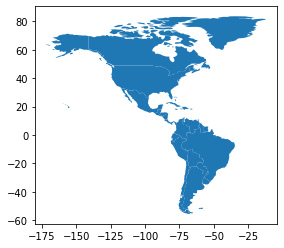

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(["North America", "South America"])]
americas.plot()

In [13]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Create a single plot that shows both: 
(1) the country boundaries in the americas GeoDataFrame, and 
(2) all of the points in the birds_gdf GeoDataFrame.

<AxesSubplot:>

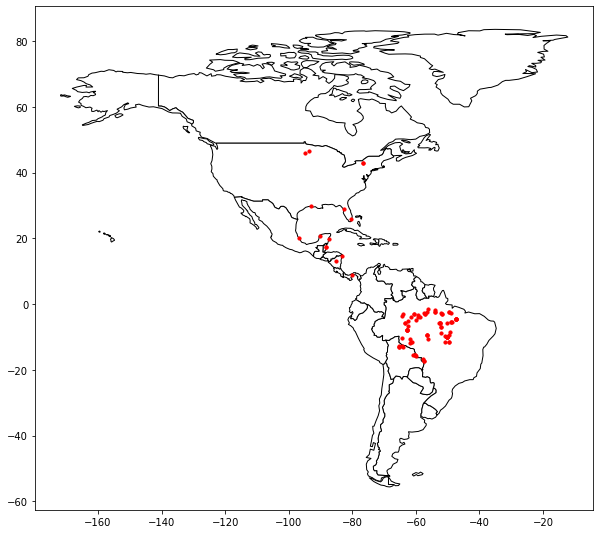

In [18]:
america_plot = americas.plot(figsize=(10, 10), color='white', edgecolor='black', linestyle='-')
birds.plot(ax=america_plot, color='red', markersize=10)

Create two dataframes:

(1) path_gdf contains LineString objects that show the path of each bird. It uses the LineString() method to create a LineString object from a list of Point objects.

(2) start_gdf contains the starting points for each bird.

In [34]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs = {'init' :'epsg:4326'}

# Show first five rows of GeoDataFrame
start_gdf.head()

e:\SelfLearning\Kaggle\kaggleEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
e:\SelfLearning\Kaggle\kaggleEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


Create a GeoDataFrame end_gdf containing the final location of each bird.

The format should be identical to that of start_gdf, with two columns ("tag-local-identifier" and "geometry"), where the "geometry" column contains Point objects.
Set the CRS of end_gdf to {'init': 'epsg:4326'}.

In [36]:
end_df = birds_df.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs = {'init' :'epsg:4326'}
end_gdf.head()

e:\SelfLearning\Kaggle\kaggleEnv\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,tag-local-identifier,geometry
0,30048,POINT (-47.53632 -4.43758)
1,30054,POINT (-62.47914 -5.03840)
2,30198,POINT (-57.46417 -2.77617)
3,30263,POINT (-50.19230 -5.70504)
4,30275,POINT (-57.70404 -16.72336)


Use the GeoDataFrames from the cell above (path_gdf, start_gdf, and end_gdf) to visualize the paths of all birds on a single map. You may also want to use the americas GeoDataFrame.

<AxesSubplot:>

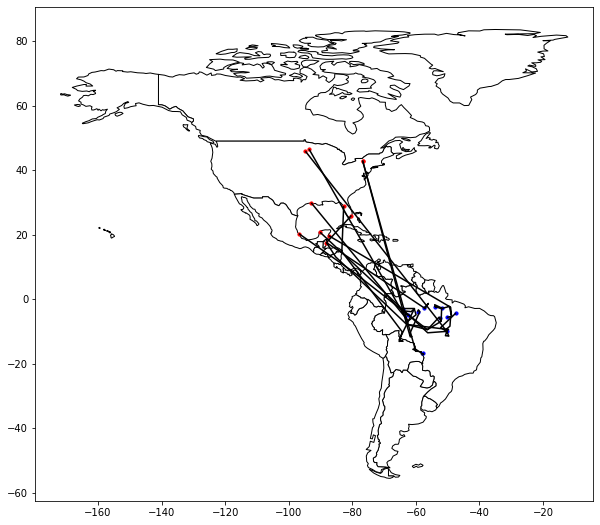

In [43]:
# ax = path_gdf.plot(figsize=(10, 10), color='black', edgecolor='black', linestyle='-')
ax = americas.plot(figsize=(10, 10), color='white', edgecolor='black', linestyle='-')
path_gdf.plot(ax=ax, color='black', markersize=10)
start_gdf.plot(ax=ax, color='red', markersize=10)
end_gdf.plot(ax=ax, color='blue', markersize=10)

<AxesSubplot:>

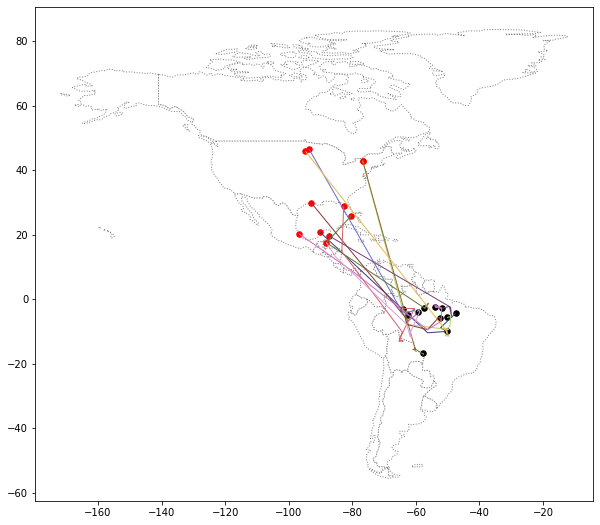

In [45]:
ax = americas.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')

start_gdf.plot(ax=ax, color='red',  markersize=30)
path_gdf.plot(ax=ax, cmap='tab20b', linestyle='-', linewidth=1, zorder=5)
end_gdf.plot(ax=ax, color='black', markersize=30)

Create a GeoDataFrame protected_areas containing the locations of all of the protected areas in South America. The corresponding shapefile is located at filepath protected_filepath.

In [46]:
# Path of the shapefile to load
protected_filepath = ".\GeoSpatialData\SAPA_Aug2019-shapefile\SAPA_Aug2019-shapefile\SAPA_Aug2019-shapefile-polygons.shp"

# Your code here
protected_areas = gpd.read_file(protected_filepath)

Create a plot that uses the protected_areas GeoDataFrame to show the locations of the protected areas in South America. (You'll notice that some protected areas are on land, while others are in marine waters.)

<AxesSubplot:>

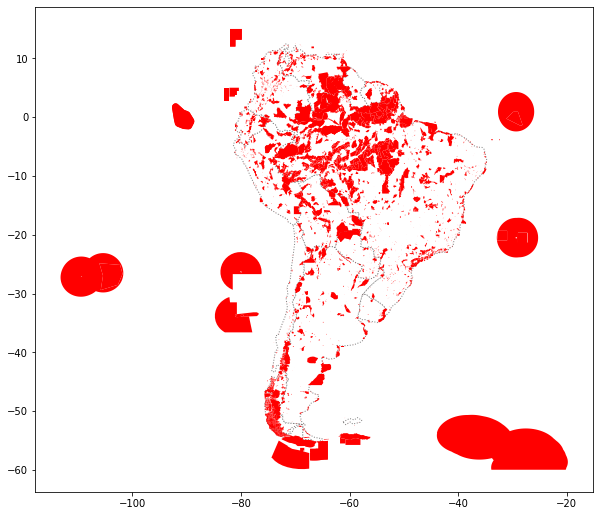

In [51]:

south_america = americas.loc[americas['continent'] == 'South America']
ax_sa = south_america.plot(figsize=(10, 10), color='white', linestyle=':', edgecolor='gray')
protected_areas.plot(ax=ax_sa, color='red', linewidth=1, zorder=5)

Calculate the total area of all protected lands in South America (not including marine area). To do this, you use the "REP_AREA" and "REP_M_AREA" columns, which contain the total area and total marine area, respectively, in square kilometers.

In [61]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas (excluding marine area).".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas (excluding marine area).


Calculate the total area of South America by following these steps:

Calculate the area of each country using the area attribute of each polygon (with EPSG 3035 as the CRS), and add up the results. The calculated area will be in units of square meters.
Convert your answer to have units of square kilometeters.


In [63]:
south_america.geometry.area.sum()

C:\Users\AMPARI~1\AppData\Local\Temp/ipykernel_13212/2371699283.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  south_america.geometry.area.sum()


1547.957692761746

In [65]:
(south_america.geometry.to_crs(epsg=3035).area.sum()/1000000)

17759005.81506123